In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
varied_param = 'influencer_attention_bound'
varied_param_legend_label = 'Attention Bound'
varied_param_x_label = 'Influencer Attention Bound'

In [4]:
num_influencers = 1
num_agents = 8

attention_bounds = list(np.linspace(20, 250, 15))

varied_param_values = attention_bounds

In [5]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=lambda x: inverse_decay(x, 0.5, 2),
    consumer_topic_interest_func=lambda x: inverse_decay(x, 0.5, 2),
    consumer_attention_bound=50,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=attention_bounds,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing influencer 8
Optimizing producer 0
Optimization succeeded (overall 0.0034464580239728093s): nit=4, nfev=14, njev=7.
Optimizing producer 1
Optimization succeeded (overall 0.0028410839731805027s): nit=3, nfev=12, njev=6.
Optimizing producer 2
Optimization succeeded (overall 0.0023490420426242054s): nit=3, nfev=10, njev=5.
Optimizing producer 3
Optimization succeeded (overall 0.0018954169936478138s): nit=2, nfev=8, njev=4.
Optimizing producer 4
Optimization succeeded (overall 0.0018980830209329724s): nit=2, nfev=8, njev=4.
Optimizing producer 5
Optimization succeeded (overall 0.0023424170212820172s): nit=3, nfev=10, njev=5.
Optimizing producer 6
Optimization succeeded (overall 0.002786375000141561s): nit=3, nfev=12, njev=6.
Optimizing producer 7
Optimization succeeded (overall 0.0032670830260030925s): nit

KeyboardInterrupt: 

In [ ]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

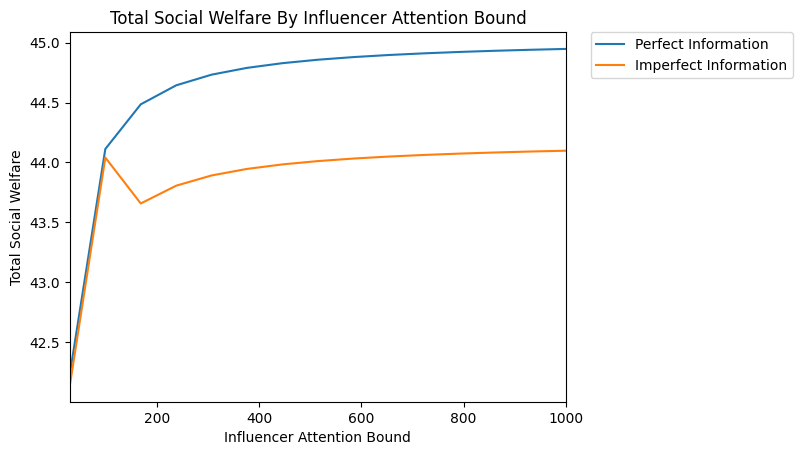

In [ ]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

In [ ]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

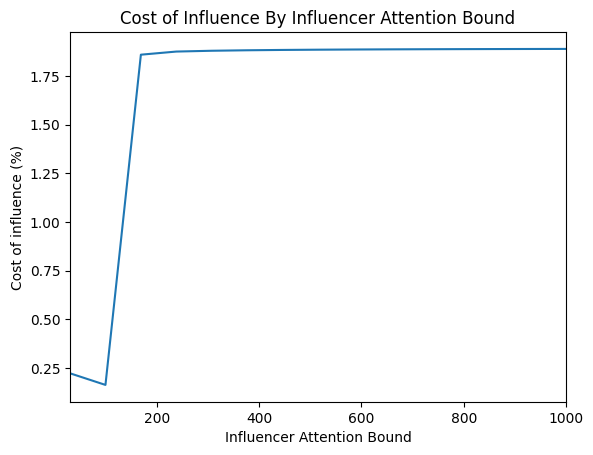

In [ ]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label)

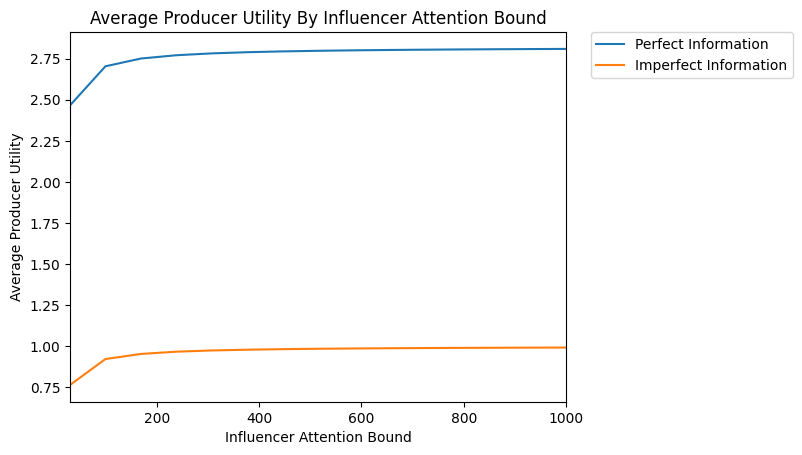

In [ ]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

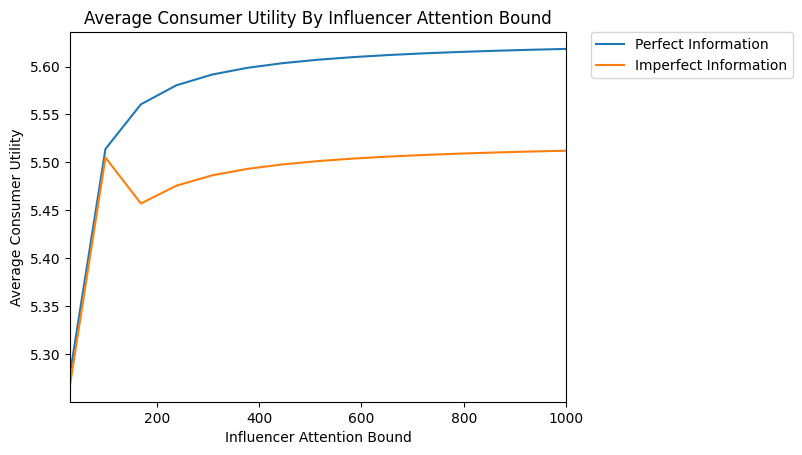

In [ ]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

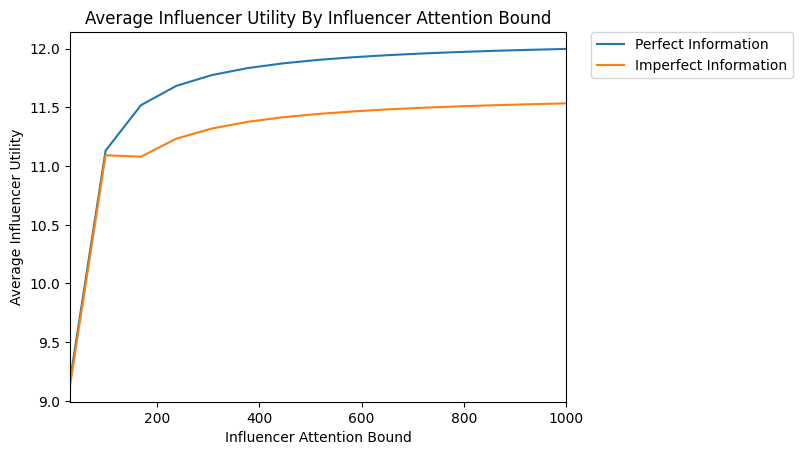

In [ ]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

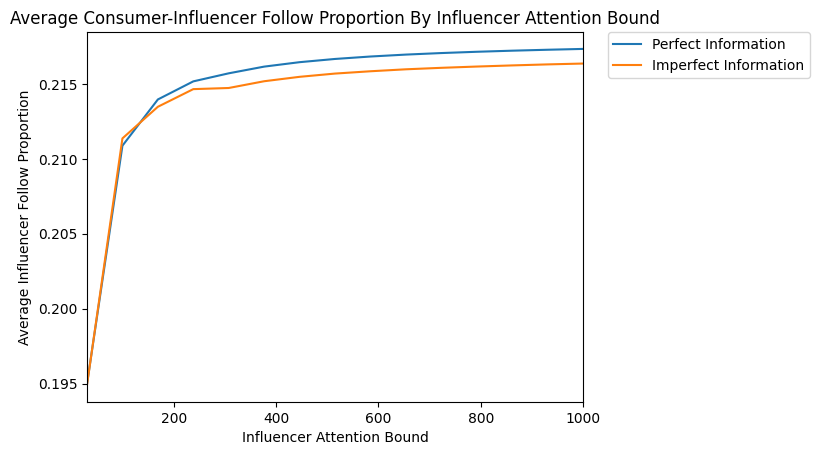

In [ ]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

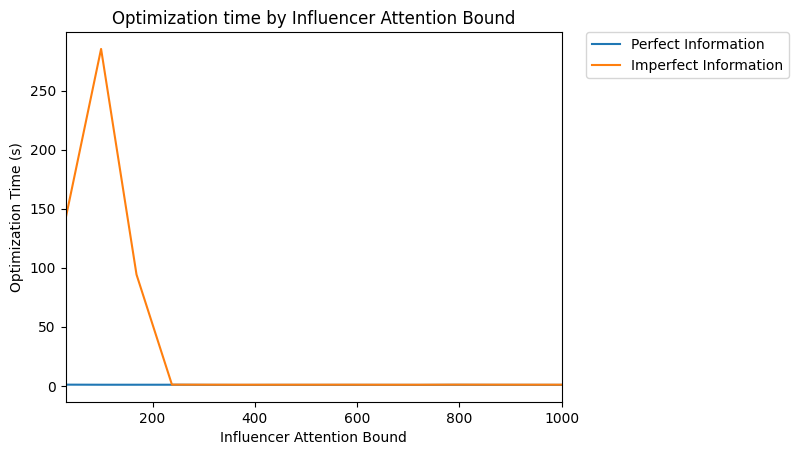

In [ ]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

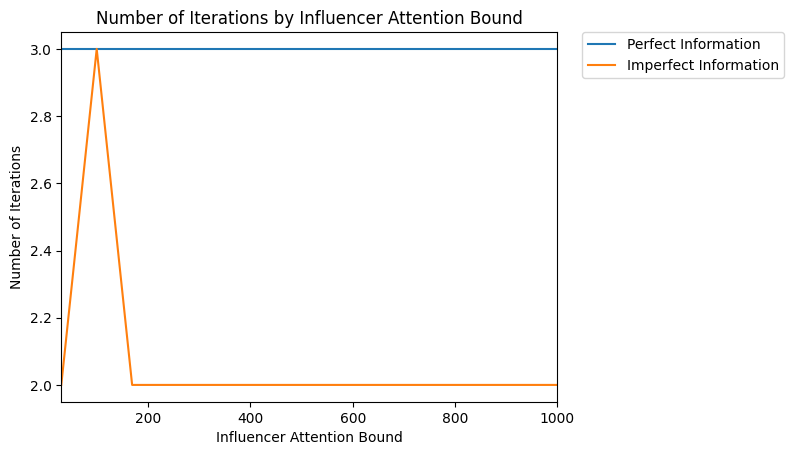

In [ ]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

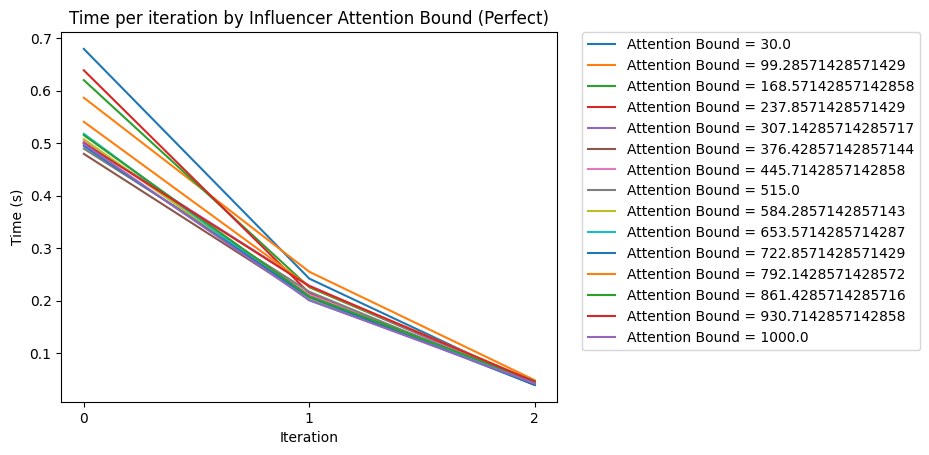

In [ ]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

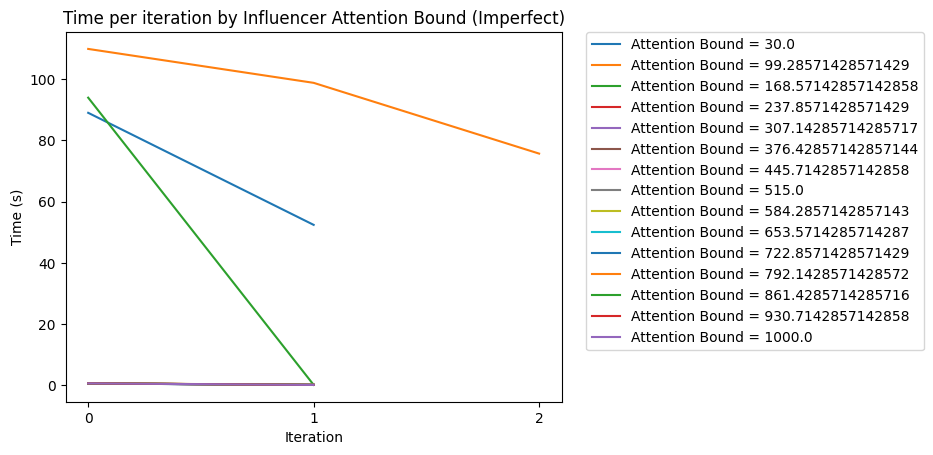

In [ ]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

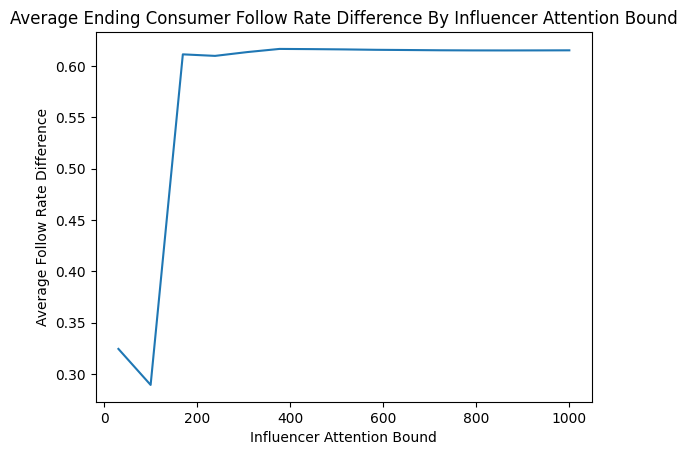

In [ ]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

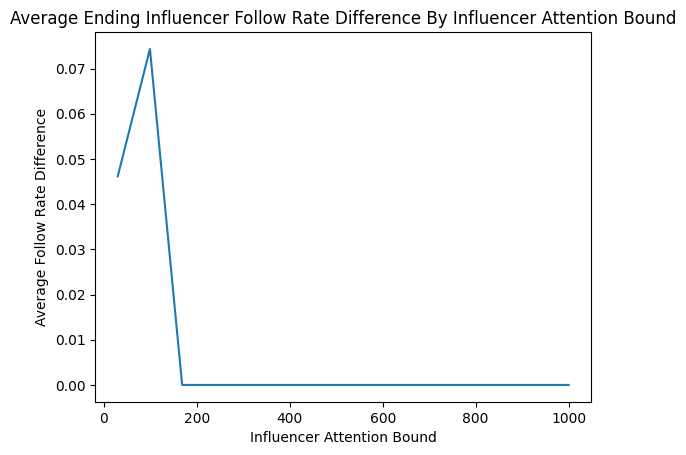

In [ ]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

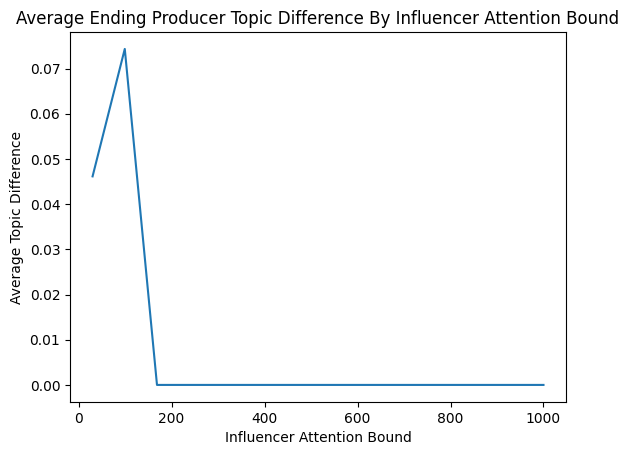

In [ ]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1])
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

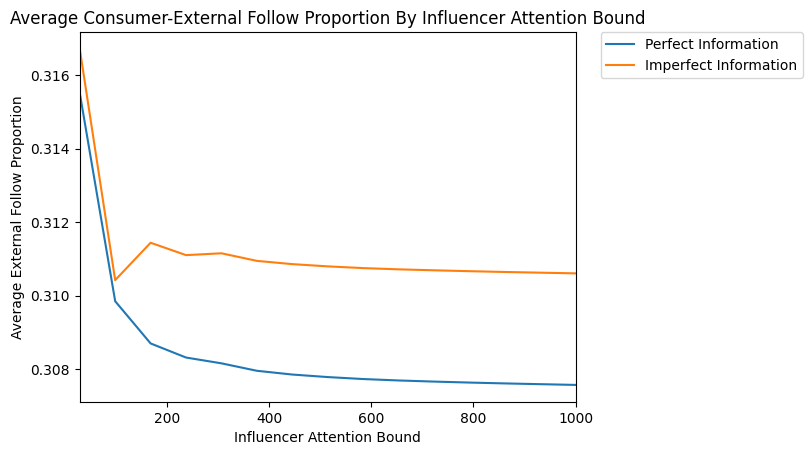

In [ ]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

In [ ]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 3, 'total_consumer_utility': [0, 42.22722441247009, 42.23765691676409, 42.2376936666082], 'total_producer_utility': [0, 19.70090063563285, 19.7262831215053, 19.726319871349403], 'total_influencer_utility': [0, 9.172407941554754, 9.180939847199566, 9.181124595266184], 'total_social_welfare': [0, 42.22722441247009, 42.23765691676409, 42.2376936666082], 'average_consumer_rate_change': [0, 13.4473943468902, 0.6080707269251693, 0.0], 'average_producer_topic_change': [0, 0.05634293275882801, 0.0028405708676939555, 0.0004183923169689789], 'average_influencer_rate_change': [0, 1.2762382288216587, 0.4206747313154899, 0.0], 'average_consumer_utility_change': [0, 5.278403051558762, 0.0013040630367497918, 4.5937305133136874e-06], 'average_producer_utility_change': [0, 2.462612579454106, 0.003172810734056508, 4.593730513230421e-06], 'average_influencer_utility_change': [0, 9.172407941554754, 0.008531905644812099, 0.00018474806661750165], 'consumer_stats': {0: {'utilities': [0, 4.

In [ ]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 2, 'total_consumer_utility': [0, 42.134912150702874, 42.14389025877449], 'total_producer_utility': [0, 6.116873982111136, 6.116873982111136], 'total_influencer_utility': [0, 9.127186208239532, 9.13553103273169], 'total_social_welfare': [0, 42.134912150702874, 42.14389025877449], 'average_consumer_rate_change': [0, 13.4473943468902, 0.5470990604554439], 'average_producer_topic_change': [0, 0.04278550608947311, 2.8634780108276192e-06], 'average_influencer_rate_change': [0, 1.2762382288216587, 0.403543087742647], 'average_consumer_utility_change': [0, 5.266864018837859, 0.0011222635089525035], 'average_producer_utility_change': [0, 0.7646092477638922, 0.0], 'average_influencer_utility_change': [0, 9.127186208239532, 0.008344824492157343], 'consumer_stats': {0: {'utilities': [0, 4.20287299837438, 4.2016631222285525], 'utility_change': [0, 4.20287299837438, -0.0012098761458272378], 'optimization_times': [0.07864637504098937, 0.029181249963585287], 'following_rates': [arra